In [74]:
import pandas as pd

In [82]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [83]:
df.head() # Top 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [84]:
df.tail() #last 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [85]:
type(df)

pandas.core.frame.DataFrame

In [86]:
list(df.columns) #list of columns

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [87]:
df.shape # Basic information

(6435, 8)

In [88]:
max_sales = df.groupby('Store').agg({'Weekly_Sales': 'sum'}) # Total sales of each store

In [89]:
max_sales[max_sales.Weekly_Sales == max_sales.Weekly_Sales.max()]

,Weekly_Sales
Store,
20,3.013978e+08


In [90]:
STD_DEV = df.groupby('Store').agg({'Weekly_Sales':'std'})  # To find out deviation of sales of each store

In [91]:
STD_DEV[STD_DEV.Weekly_Sales == STD_DEV.Weekly_Sales.max()] # Sales of store having maximum standard deviation

,Weekly_Sales
Store,
14,317569.949476


In [92]:
mean_value = df.Weekly_Sales.mean()
std_value = df.Weekly_Sales.std()

coefficient_1 = std_value/mean_value
coefficient = mean_value/std_value

round(coefficient, 2)

1.86

In [93]:
from datetime import datetime
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [94]:
df.shape


(6435, 8)

In [95]:
type(df.iloc[0,1]) # Type item of data column

str

In [96]:
def convert_datetime(x):
    return datetime.strptime(x,"%d-%m-%Y") # convert str to datetime

In [97]:
df['Date']=df.Date.apply(convert_datetime)

In [98]:
# Function to filter Q3 dates

def filter_date_q3(x):
    if x.month > 8 and x.year == 2012:
        return True
    else:
        return False

In [99]:
#Function to filter Q3 dates
def filter_date_q2(x):
    if x.month <= 8 and x.month > 4 and x.year == 2012:
        return True
    else:
        return False

In [100]:
#Average sales of Q2 and Q3
Q3=df[df.Date.apply(filter_date_q3)].groupby(['Store']).agg({'Weekly_Sales': 'mean'})
Q2=df[df.Date.apply(filter_date_q2)].groupby(['Store']).agg({'Weekly_Sales': 'mean'})

In [101]:
df1 = (Q3 - Q2) # Subtract average growth of each store with Q2 and Q3

In [102]:
df1[df1.Weekly_Sales == df1.Weekly_Sales.max()]

,Weekly_Sales
Store,
17,62248.312639


In [103]:
mean_sales_non_holiday=df[df.Holiday_Flag == 0].agg({'Weekly_Sales': 'mean'}) #Mean sales for non-holiday seasons of all stores

In [104]:
mean_sales_non_holiday

Weekly_Sales    1.041256e+06
dtype: float64

In [105]:
# Function to find holidays which have higher sales than the mean sales.
def sales_check(x):
    if x > mean_sales_non_holiday[0]:
        return True
    else:
        return False

In [106]:
#Holidays which have higher sales than the non-holiday weeks
Higher_sales_week=df[df.Holiday_Flag == 1].loc[df.Weekly_Sales.apply(sales_check)]
Higher_sales_week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [107]:
Higher_sales_week.set_index('Store', inplace=True)

In [108]:
Higher_sales_week

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...
41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589
41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432


In [109]:
Higher_sales_week[['Date']]

,Date
Store,
1,2010-02-12
1,2010-09-10
1,2010-11-26
1,2010-12-31
1,2011-02-11
...,...
41,2011-12-30
41,2012-02-10
41,2012-09-07


In [110]:
#New columns for Day, Month and Year for future prediction
df['Days'] = df.Date.apply(lambda x: x.day)
df['Months'] = df.Date.apply(lambda x: x.month)
df['Years'] = df.Date.apply(lambda x: x.year)
df['Days'] = df.Date.apply(lambda x: x.weekday())


In [111]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [112]:
#Total sales of each store on monthly basis
total_sales_monthly=df.groupby('Years').agg({'Weekly_Sales': 'sum'})

In [113]:
total_sales_monthly

,Weekly_Sales
Years,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [114]:
#Statistical prediction models to forecast demand 
store1= df.loc[df['Store'] == 1]

In [115]:
store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [116]:
store1.shape

(143, 11)

In [117]:
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

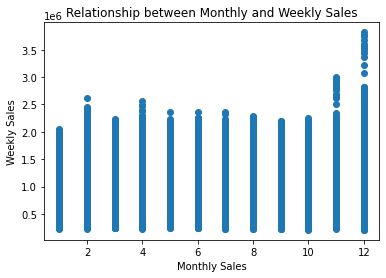

In [118]:
# Sales Statistical model
plt.scatter(df.Months, df.Weekly_Sales)
plt.title("Relationship between Monthly and Weekly Sales")
plt.xlabel("Monthly Sales")
plt.ylabel("Weekly Sales")
plt.show()

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [120]:
df['Day'] = df['Date'].dt.day # Change dates into days by creating a new variable

In [121]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010,5


In [122]:
#Prediction model to forecast demand for store 1
dfReport=df
dfReport= dfReport.set_index('Date')
dfReport.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

y = dfReport['Weekly_Sales'].resample('MS').mean()

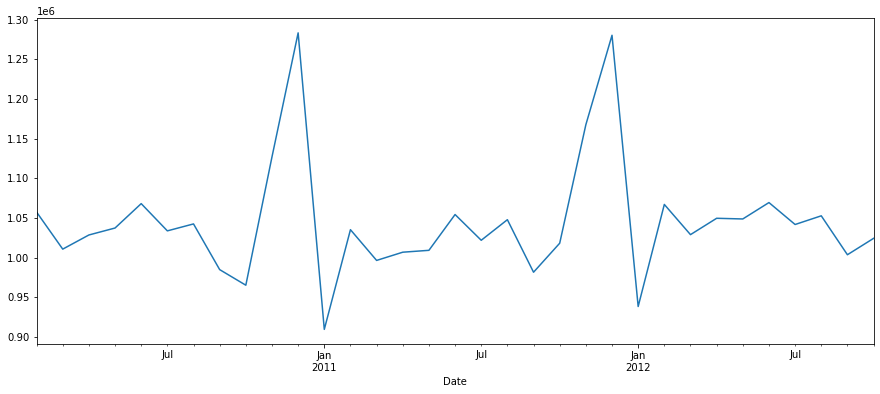

In [124]:
y.plot(figsize=(15, 6))
plt.show()

In [125]:
import statsmodels.api as sm

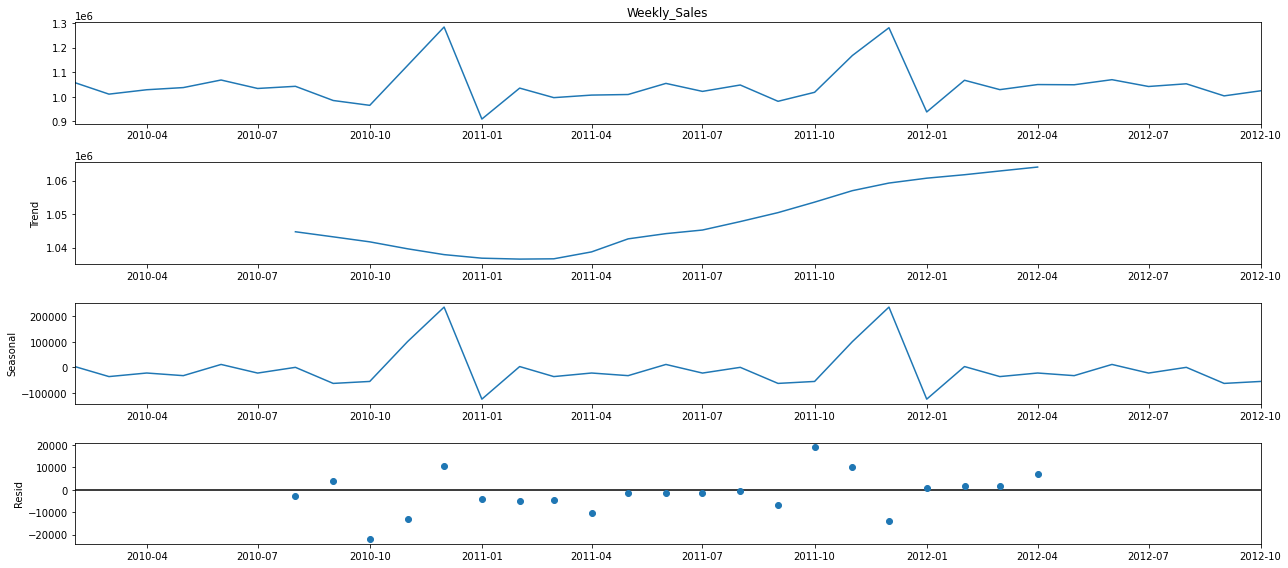

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition=sm.tsa.seasonal_decompose(y, model='additive')
fig=decomposition.plot()
plt.show()

In [127]:
# Linear Regression hypothesis to verify if CPI , Unemployment and fuel price have any impact on sales.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [128]:
df.sort_values(by=['Date'], inplace=True)

In [129]:
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010,5
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,4,2,2010,5
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,4,2,2010,5
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,4,2,2010,5
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,4,2,2010,5
3432,25,2010-02-05,677231.63,0,21.10,2.784,204.247194,8.187,4,2,2010,5
3003,22,2010-02-05,1033017.37,0,24.36,2.788,135.352461,8.283,4,2,2010,5
3146,23,2010-02-05,1364721.58,0,15.25,2.788,131.527903,5.892,4,2,2010,5
3289,24,2010-02-05,1388725.63,0,22.43,2.954,131.527903,8.326,4,2,2010,5
2574,19,2010-02-05,1507637.17,0,20.96,2.954,131.527903,8.350,4,2,2010,5


In [130]:
x=df[['CPI','Unemployment','Fuel_Price']]
y=df['Weekly_Sales']

In [131]:
regs= linear_model.LinearRegression()
regs.fit(x,y)

print ('Intercept: \n', regs.intercept_)
print ('Coefficients: \n', regs.coef_)

x= sm.add_constant(x)

model= sm.OLS(y,x).fit()
predictions=model.predict(x)

print_model=model.summary()
print(print_model)



Intercept: 
 1745656.7091414544
Coefficients: 
 [ -1696.87595751 -42859.19551752 -19266.14354598]
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     51.75
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           4.81e-33
Time:                        17:34:58   Log-Likelihood:                -94275.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------